Name: Saleh Abdallah

In [144]:
# df Dataset Exploratory Data Analysis

# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [145]:
# Task 1: Load the df dataset
# TODO: Load the df dataset from the following URL
url = "https://web.stanford.edu/class/archive/cs/cs109/cs109.1166/stuff/titanic.csv"
df = pd.read_csv(url, na_values=' ?', skipinitialspace=True)
df.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'Siblings/Spouses Aboard',
       'Parents/Children Aboard', 'Fare'],
      dtype='object')

In [146]:
# Reading the local file as the file at the provided url misses some features
df = pd.read_csv('Titanic-Dataset.csv')

In [147]:
# Task 2: Inspect the data
# TODO: Display the first 5 rows of the dataset
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [148]:
# TODO: Display the last 5 rows of the dataset
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [149]:
# TODO: Display the data types of each column
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [150]:
# TODO: Display summary statistics of the numerical columns
df.describe().round(2)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.00,891.00,891.00,714.00,891.00,891.00,891.00
mean,446.00,0.38,2.31,29.70,0.52,0.38,32.20
std,257.35,0.49,0.84,14.53,1.10,0.81,49.69
min,1.00,0.00,1.00,0.42,0.00,0.00,0.00
25%,223.50,0.00,2.00,20.12,0.00,0.00,7.91
50%,446.00,0.00,3.00,28.00,0.00,0.00,14.45
75%,668.50,1.00,3.00,38.00,1.00,0.00,31.00
max,891.00,1.00,3.00,80.00,8.00,6.00,512.33


In [151]:
# Task 3: Clean and preprocess the data

# TODO: Create a new categorical feature 'PclassCategory' from 'Pclass'
df['PclassCategory'] = df['Pclass'].map({1: 'First', 2: 'Second', 3: 'Third'})
df[['Pclass', 'PclassCategory']].head()

,Pclass,PclassCategory
0,3,Third
1,1,First
2,3,Third
3,1,First
4,3,Third


In [152]:
# Fill the null values in the Cabin with the mode
print('Cabin missing values:', df['Cabin'].isnull().sum())
df['Cabin'].fillna(df['Cabin'].mode()[0], inplace=True)
print('Cabin missing values after update:', df['Cabin'].isnull().sum())

Cabin missing values: 687
Cabin missing values after update: 0


In [153]:
# Check the Cabin data
df['Cabin'].unique()

array(['B96 B98', 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'E10', 'E44', 'A34',
       'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14', 'B37',
       'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38', 'B39',
       'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68', 'B41',
       'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48', 'E58',
       'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64', 'E24

In [154]:
# TODO: Create a new categorical feature 'CabinCategory' from 'Cabin'
# Create CabinCategory Using the first letter in Cabin 
df['CabinCategory'] = df['Cabin'].str[0]
df['CabinCategory'].unique()

array(['B', 'C', 'E', 'G', 'D', 'A', 'F', 'T'], dtype=object)

In [155]:
# TODO: Handle missing values in the 'Age' column (use mean age)
print('Age missing values:', df['Age'].isnull().sum())
df['Age'].fillna(df['Age'].mean(), inplace=True)
print('Age missing values after update:', df['Age'].isnull().sum())

Age missing values: 177
Age missing values after update: 0


In [156]:
# TODO: Create a 'Family' feature by combining 'SibSp' and 'Parch'
df['Family'] = df['SibSp'] + df['Parch']
df[['SibSp', 'Parch', 'Family']].head()

,SibSp,Parch,Family
0,1,0,1
1,1,0,1
2,0,0,0
3,1,0,1
4,0,0,0


In [157]:
# Task 4: Identify specific data points

# TODO: Find passengers with the highest fare
# Fares more than 250
highest_fare_passengers = df[df['Fare'] > 250]
highest_fare_passengers[['Name', 'Fare']]

,Name,Fare
27,"Fortune, Mr. Charles Alexander",263.0000
88,"Fortune, Miss. Mabel Helen",263.0000
258,"Ward, Miss. Anna",512.3292
311,"Ryerson, Miss. Emily Borie",262.3750
341,"Fortune, Miss. Alice Elizabeth",263.0000
438,"Fortune, Mr. Mark",263.0000
679,"Cardeza, Mr. Thomas Drake Martinez",512.3292
737,"Lesurer, Mr. Gustave J",512.3292
742,"Ryerson, Miss. Susan Parker ""Suzette""",262.3750


In [158]:
# TODO: Find passengers with the largest family size
largest_family_passengers = df[df['Family'] == df['Family'].max()]
largest_family_passengers[['Name', 'Family']]

,Name,Family
159,"Sage, Master. Thomas Henry",10
180,"Sage, Miss. Constance Gladys",10
201,"Sage, Mr. Frederick",10
324,"Sage, Mr. George John Jr",10
792,"Sage, Miss. Stella Anna",10
846,"Sage, Mr. Douglas Bullen",10
863,"Sage, Miss. Dorothy Edith ""Dolly""",10


In [159]:
# Task 5: Demonstrate Pandas Series and DataFrame functionalities

# TODO: Create a Pandas Series of passenger names
names_series = df['Name']
names_series.head()

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
Name: Name, dtype: object

In [160]:
# TODO: Create a DataFrame of passenger names and ages
names_ages_df = df[['Name', 'Age']]
names_ages_df.head()


,Name,Age
0,"Braund, Mr. Owen Harris",22.0
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0
2,"Heikkinen, Miss. Laina",26.0
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0
4,"Allen, Mr. William Henry",35.0


In [161]:
# TODO: Slice the DataFrame to show only passengers older than 50
older_passengers = names_ages_df[names_ages_df['Age'] > 50]
older_passengers.head()

,Name,Age
6,"McCarthy, Mr. Timothy J",54.0
11,"Bonnell, Miss. Elizabeth",58.0
15,"Hewlett, Mrs. (Mary D Kingcome)",55.0
33,"Wheadon, Mr. Edward H",66.0
54,"Ostby, Mr. Engelhart Cornelius",65.0


In [162]:
# Task 6: Introduce multi-indexing

# TODO: Create a multi-index DataFrame grouped by 'Sex' and 'Pclass'
# Display Age and Fare
multi_index_df = df.groupby(['Sex', 'Pclass'])[['Age', 'Fare']].describe().round(1)
multi_index_df

Age                                            Fare         \
               count  mean   std  min   25%   50%   75%   max  count   mean   
Sex    Pclass                                                                 
female 1        94.0  34.1  13.0  2.0  24.0  32.5  42.8  63.0   94.0  106.1   
       2        76.0  28.7  12.7  2.0  22.8  28.5  36.0  57.0   76.0   22.0   
       3       144.0  24.1  11.3  0.8  18.0  28.0  29.7  63.0  144.0   16.1   
male   1       122.0  39.3  14.4  0.9  29.7  36.0  49.0  80.0  122.0   67.2   
       2       108.0  30.7  14.2  0.7  23.0  29.7  36.0  70.0  108.0   19.7   
       3       347.0  27.4  10.5  0.4  21.0  29.7  30.0  74.0  347.0   12.7   

                                                     
                std   min   25%   50%    75%    max  
Sex    Pclass                                        
female 1       74.3  25.9  57.2  82.7  134.5  512.3  
       2       10.9  10.5  13.0  22.0   26.1   65.0  
       3       11.7   6.8   7.9  12.5   20.2   69.6  
male   1       77.5   0.0  27.7  41.3   78.5  512.3  
       2       14.9   0.0  12.3  13.0   26.0   73.5  
       3       11.7   0.0   7.8   7.9   10.0   69.6

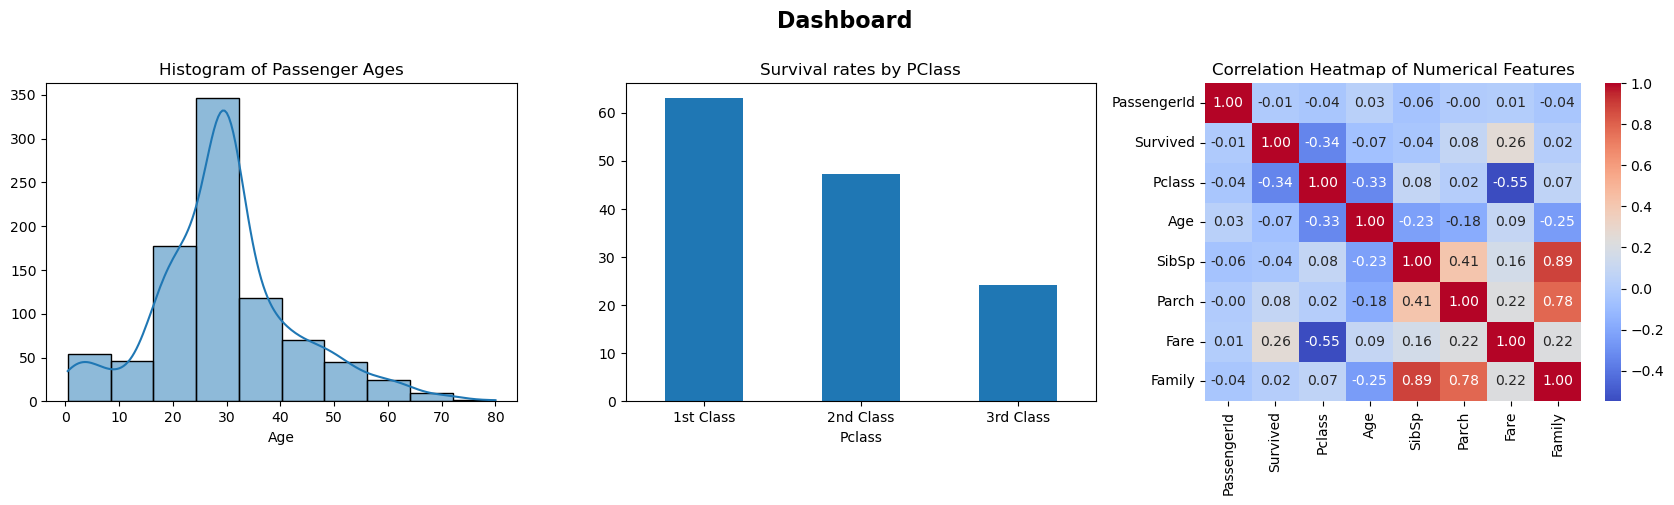

In [163]:
# Task 7: Visualizations
# Dashboard
# Create a figure with multiple subplots
fig, axes = plt.subplots(1, 3, figsize=(17, 5))
fig.suptitle('Dashboard', fontsize=16, fontweight='bold', y=1)

# TODO: Create a histogram of passenger ages
sns.histplot(df['Age'], kde=True, bins=10, ax=axes[0])
axes[0].set_title('Histogram of Passenger Ages')
axes[0].set_xlabel('Age')  
axes[0].set_ylabel('')  

# TODO: Create a bar plot of survival rates by passenger class
survival_rates = df.groupby('Pclass')['Survived'].mean().round(3) * 100
survival_rates.plot(kind='bar', ax=axes[1])
axes[1].set_title('Survival rates by PClass')
axes[1].set_xticklabels(['1st Class', '2nd Class', '3rd Class'], rotation=0)
axes[1].set_xlabel('Pclass')  
axes[1].set_ylabel('')  

# TODO: Create a heatmap of correlation between numerical features
numeric_df = df.select_dtypes(include=['number'])
correlation_matrix = numeric_df.corr() 
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', ax=axes[2]) 
axes[2].set_title('Correlation Heatmap of Numerical Features')
axes[2].set_xlabel('')  
axes[2].set_ylabel('')  

# Layout adjustment
plt.tight_layout()
plt.show()

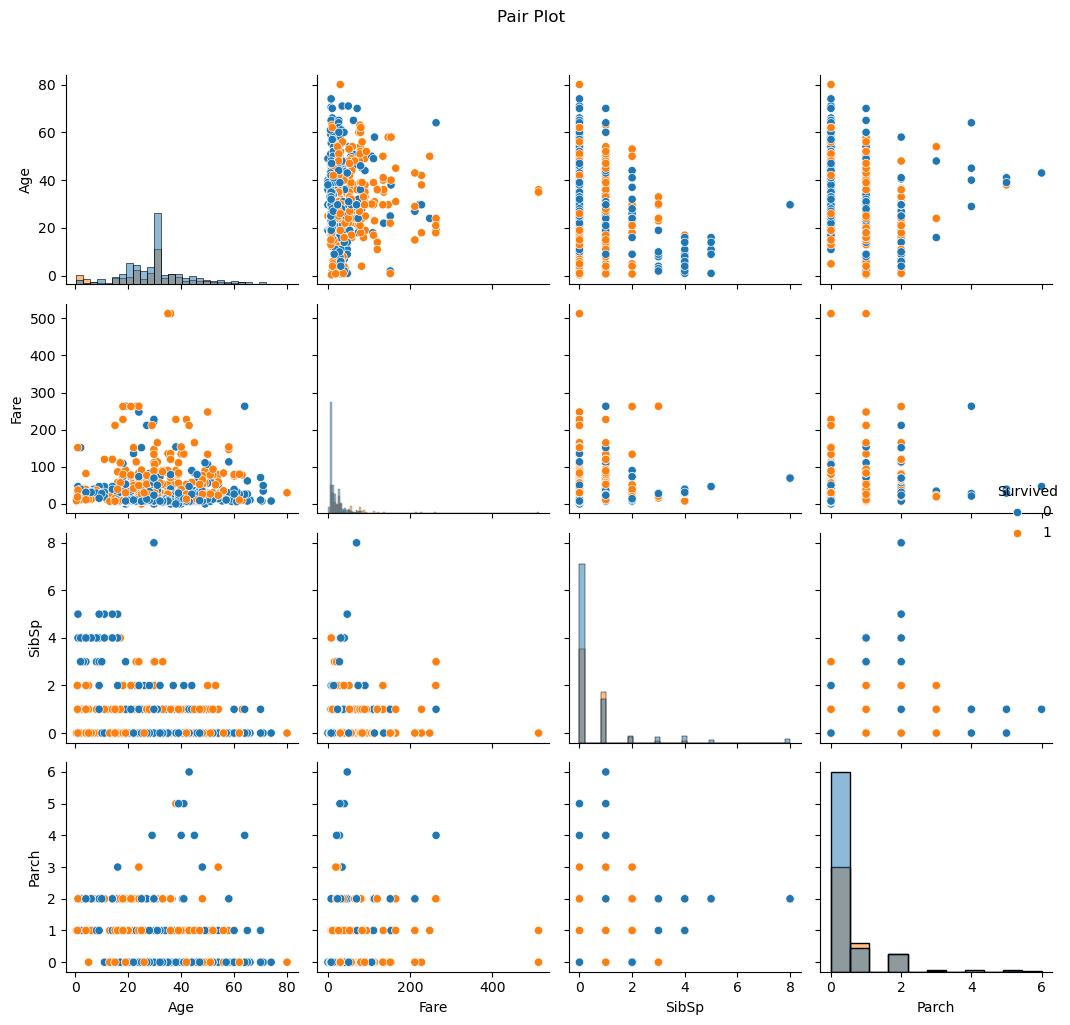

In [164]:
# TODO: Create a pair plot of 'Age', 'Fare', 'SibSp', and 'Parch', colored by 'Survived'
df_pair = df[['Age', 'Fare', 'SibSp', 'Parch', 'Survived']]
sns.pairplot(df_pair, hue='Survived', diag_kind='hist')
plt.suptitle('Pair Plot', y=1.02)

# Layout adjustment
plt.tight_layout()
plt.show()

In [165]:
# Task 8: Analyze survival rates

# TODO: Calculate and display survival rates by sex
survival_by_sex = df.groupby('Sex')['Survived'].mean().round(3)*100
survival_by_sex

# Analysis: The females survival rate is ~75% compaed to the males at ~15%

Sex
female    74.2
male      18.9
Name: Survived, dtype: float64

In [166]:
# TODO: Calculate and display survival rates by passenger class
survival_rates

# Analysis: The 1st class survival rate is equivalent to the 2nd and 3rd classes combined

Pclass
1    63.0
2    47.3
3    24.2
Name: Survived, dtype: float64

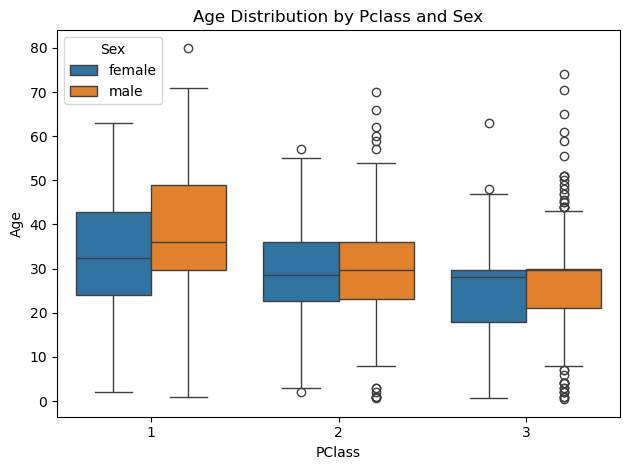

In [167]:
# Task 9: Analyze age distribution

# TODO: Create a box plot of age distribution by passenger class and sex
sns.boxplot(data=df, x='Pclass', y='Age', hue='Sex')
plt.title('Age Distribution by Pclass and Sex')
plt.xlabel('PClass')
plt.ylabel('Age')
plt.legend(title='Sex')
plt.tight_layout()
plt.show()

# Analysis: The box plot shows that the passengers in the 1st class seem to be older 
# overall, especially the males, while the 2nd is younger and the 3rd class had the 
# youngest passengers overall across both males and females.

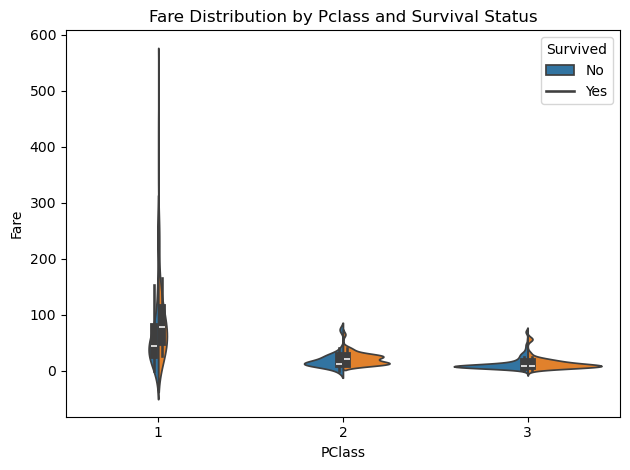

In [168]:
# Task 10: Analyze fare distribution

# TODO: Create a violin plot of fare distribution by passenger class and survival status
sns.violinplot(data=df, x='Pclass', y='Fare', hue='Survived', split=True)
plt.title('Fare Distribution by Pclass and Survival Status')
plt.xlabel('PClass')
plt.ylabel('Fare')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.tight_layout()
plt.show()

# Analysis: The violin plot shows that the 1st class passengers paid higher fares 
# than the other classes. 

In [169]:
print("EDA tasks completed.")

EDA tasks completed.
